### Training a neural network

Training in supervised learning is about finding a parameter set (weights and biases) for the neural network that such at best all labels of a labeled dataset are reproduced.

Having the network set up and provided a dataset to use for *supervised learning*, we are now in the position to train our network.

The training method is controlled by the option key `optimizer`. By default it's set to *GradientDescent*.

Moreover, the following options control the training:

- `batch_size` : if smaller than the dataset dimension, then we get Stochastic Gradient Descent (SGD)
- `learning_rate` : learning rate to use for training, i.e. scaling the gradient per step
- `loss` : type of training function to use
- `max_steps` : fixed amount of training steps to execute
- `seed` : influencing the random starting parameter choice

#### Different loss functions

Loss functions available in tensorflow are also available in `tati`. We can get a list as follows.

In [12]:
import TATi.simulation as tati

print(tati.get_losses())

AttributeError: type object 'Simulation' has no attribute 'get_losses'

#### Performing the fit

Let us use simple *mean_squared* for the moment to train a network on the provided dataset.

In [13]:
nn = tati(batch_data_files=["dataset-twoclusters.csv"],
          output_activation="linear",
          learning_rate=0.1,
          loss="mean_squared",
          max_steps=100,
          seed=426)
training_data = nn.fit()
print(nn.loss())

0.021974375


In [14]:
print(nn.parameters)

[0.14637233, 0.32722256, -0.045677684]


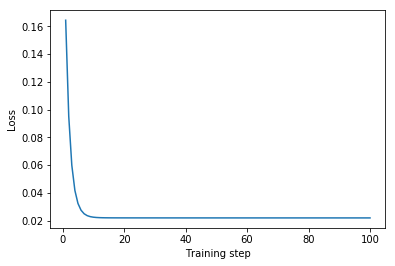

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

run = np.asarray(training_data.run_info.loc[:,['step','loss']].values)

plt.plot(run[:,0], run[:,1].astype(float))
plt.xlabel("Training step")
plt.ylabel("Loss")
plt.show()

The loss has decreased well and is close to 0.

We can also look at other values.

In [22]:
print(training_data.run_info.columns)

Index(['id', 'step', 'epoch', 'accuracy', 'loss', 'time_per_nth_step',
       'scaled_gradient', 'virial'],
      dtype='object')


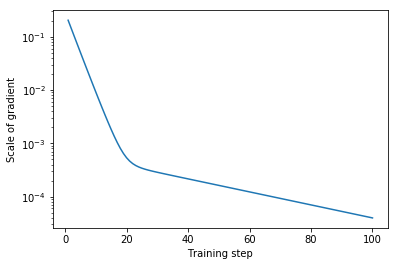

In [23]:
run = np.asarray(training_data.run_info.loc[:,['step','scaled_gradient']].values)

plt.semilogy(run[:,0], run[:,1].astype(float))
plt.xlabel("Training step")
plt.ylabel("Scale of gradient")
plt.show()